#Import Modules Ford Data Analysis

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Loading the Dataset


In [3]:
df=pd.read_csv('/content/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.shape

(768, 9)

#Exploratory Data Analysis

In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

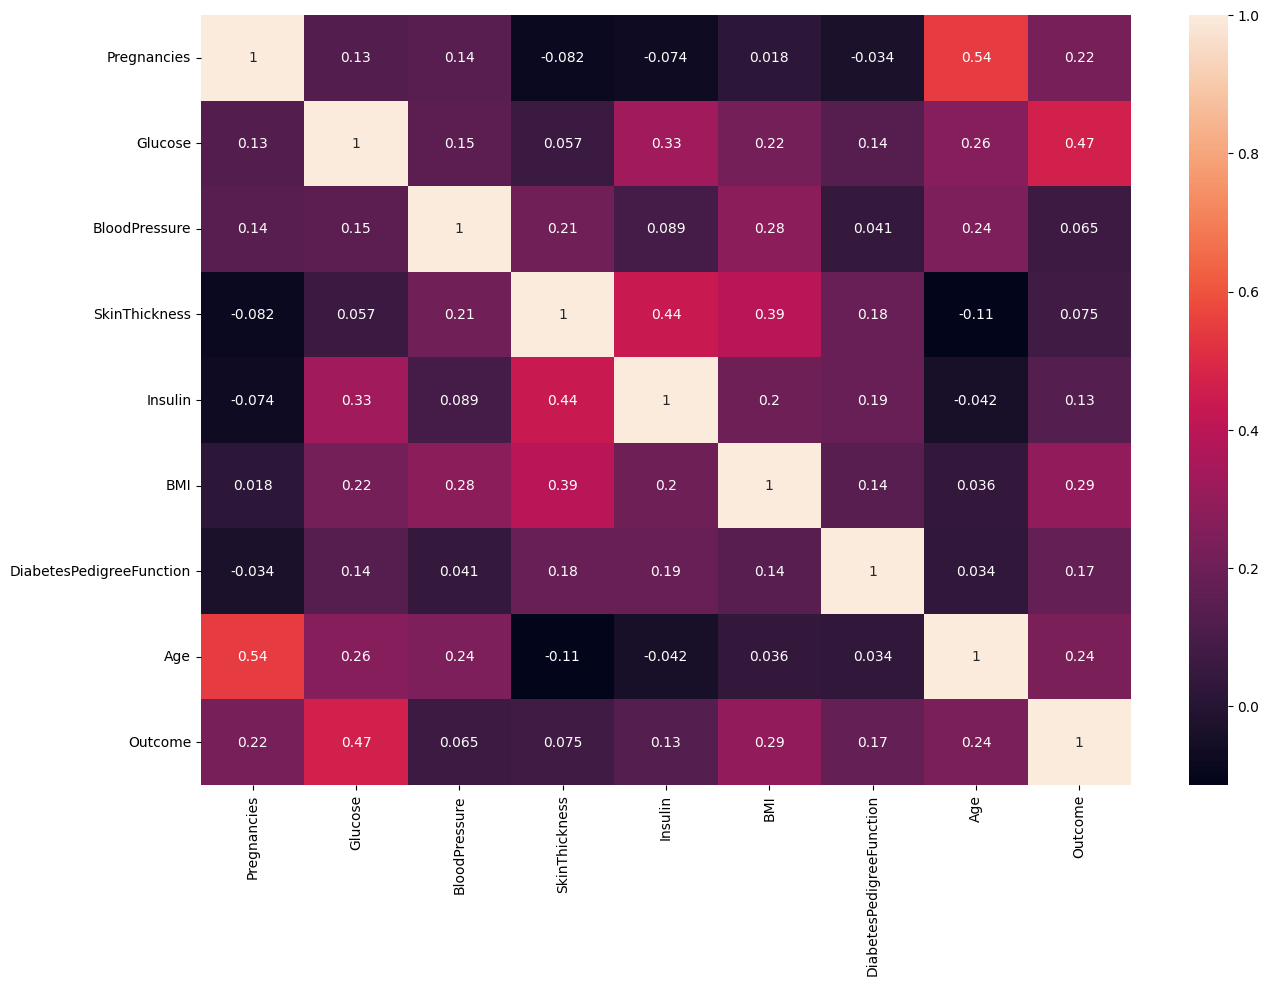

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

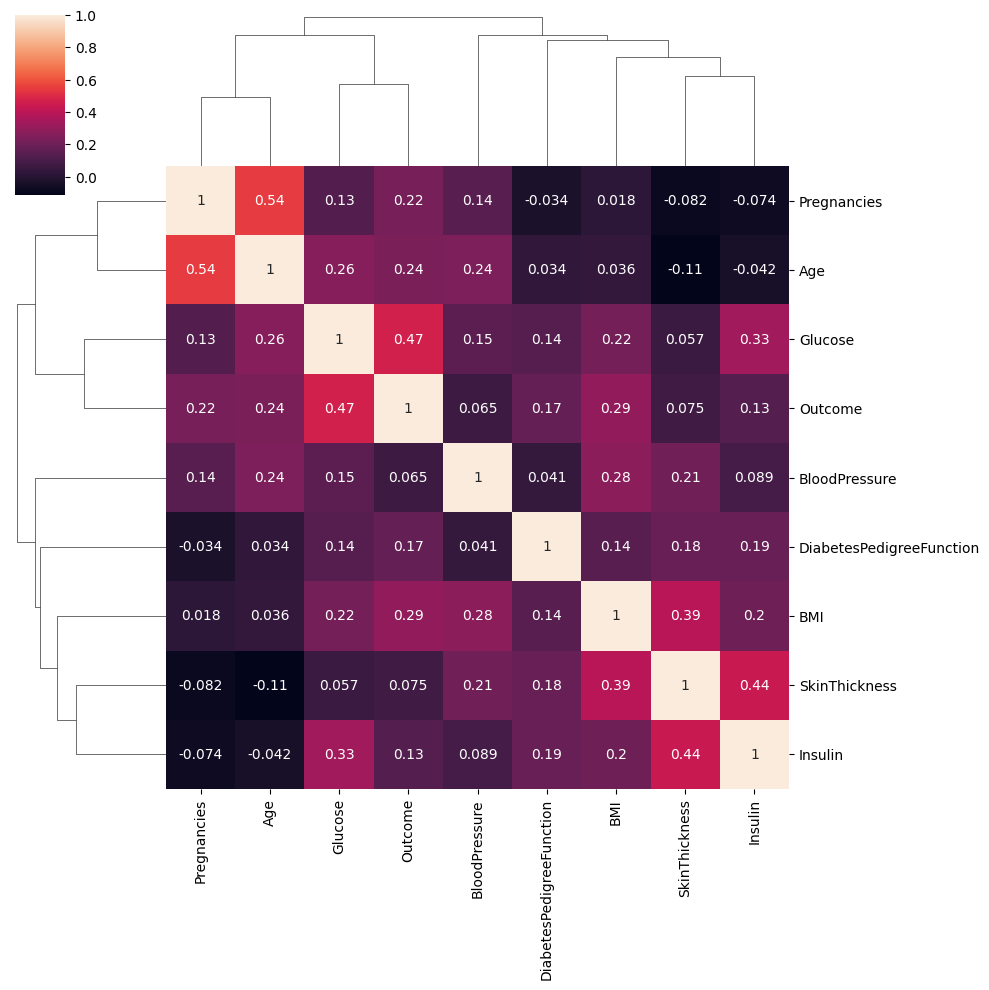

In [12]:
sns.clustermap(df.corr(numeric_only=True),annot=True)

In [13]:
# This code will show us the most correlated features
#Correlation indicates how much one variable changes when another variable changes and range from -1 to 1
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
most_correlated_pairs = (correlation_matrix.where(mask)
                         .stack()
                         .reset_index()
                         .rename(columns={0: 'correlation'})
                         .sort_values(by='correlation', ascending=False))
num_most_correlated = 10
for i, (feature1, feature2, correlation) in enumerate(most_correlated_pairs.head(num_most_correlated).itertuples(index=False), 1):
    print(f"{i}. {feature1} - {feature2}: {correlation:.2f}")

1. Pregnancies - Age: 0.54
2. Glucose - Outcome: 0.47
3. SkinThickness - Insulin: 0.44
4. SkinThickness - BMI: 0.39
5. Glucose - Insulin: 0.33
6. BMI - Outcome: 0.29
7. BloodPressure - BMI: 0.28
8. Glucose - Age: 0.26
9. BloodPressure - Age: 0.24
10. Age - Outcome: 0.24


#Features Distribution

In [14]:
numerical_features=df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_features.remove('Outcome')

numerical_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

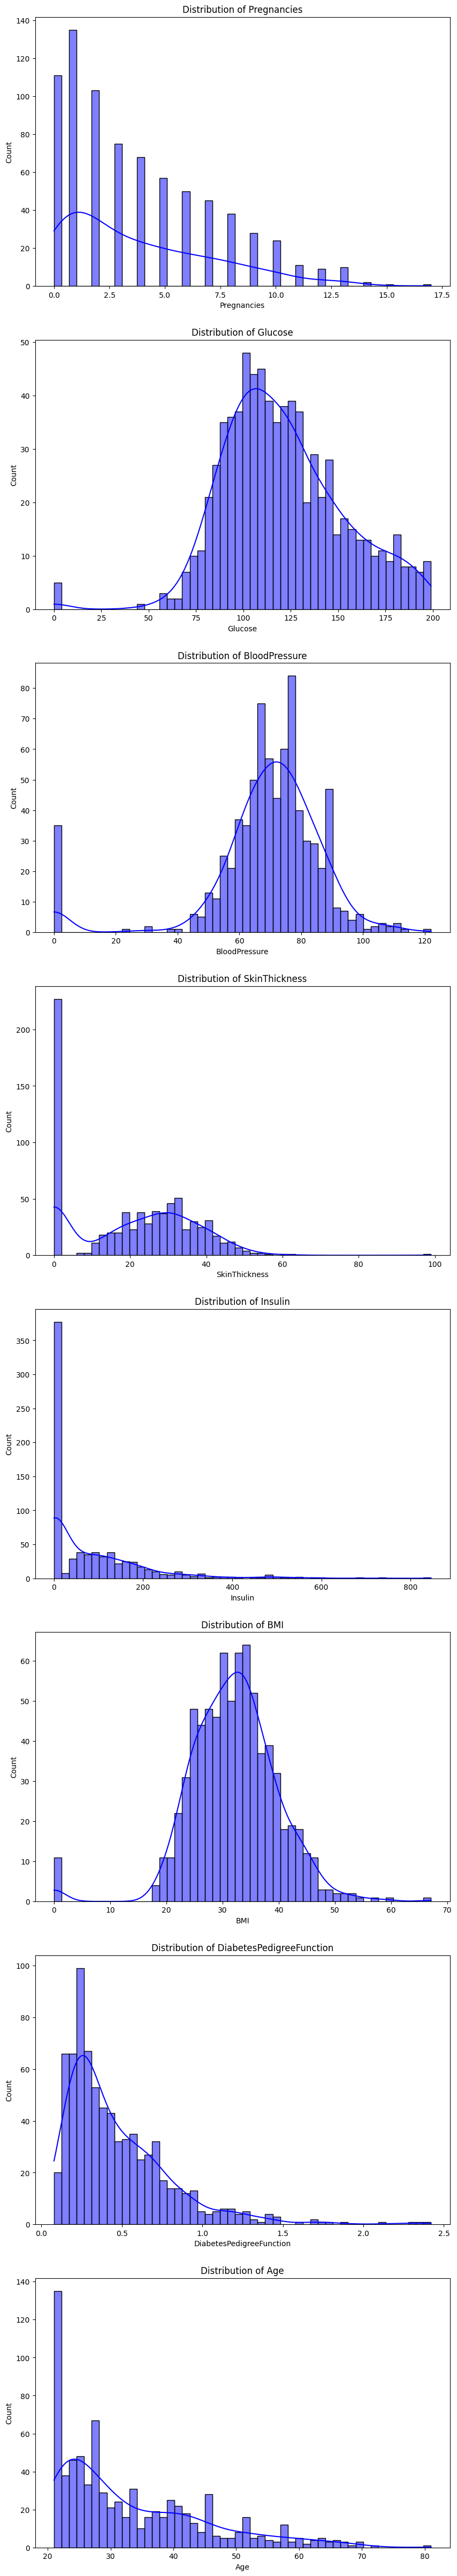

In [15]:
fig,axes=plt.subplots(len(numerical_features),1,figsize=(10,6))
plt.subplots_adjust(top=8)

for index,column in enumerate(numerical_features):
   sns.histplot(df[column],color='b',bins=50,ax=axes[index],kde=True)
   axes[index].set_title(f'Distribution of {column}')
plt.show()

In [16]:
df.duplicated().sum()

0

In [17]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<function matplotlib.pyplot.show(close=None, block=None)>

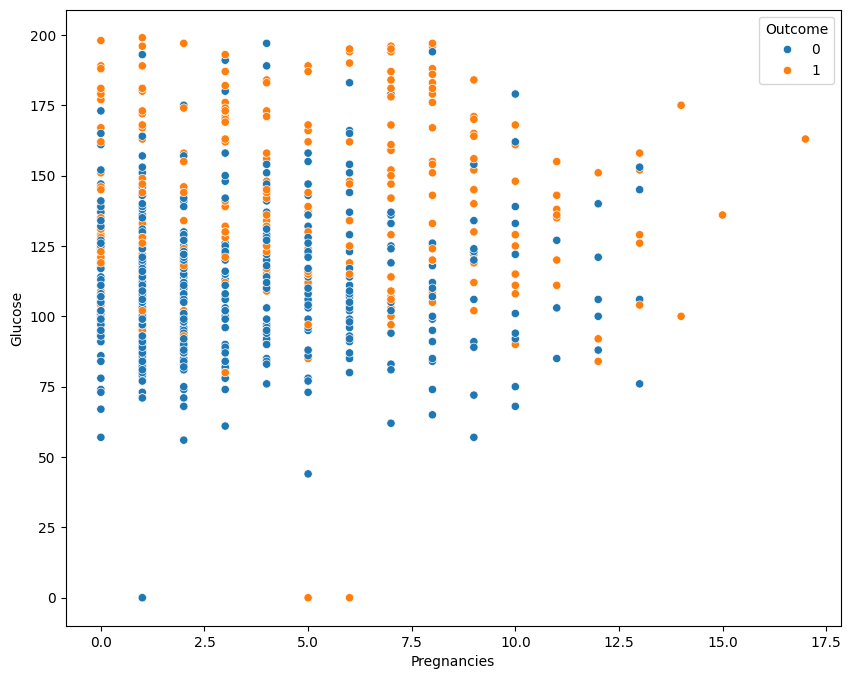

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Pregnancies',y='Glucose',data=df,hue='Outcome')
plt.show


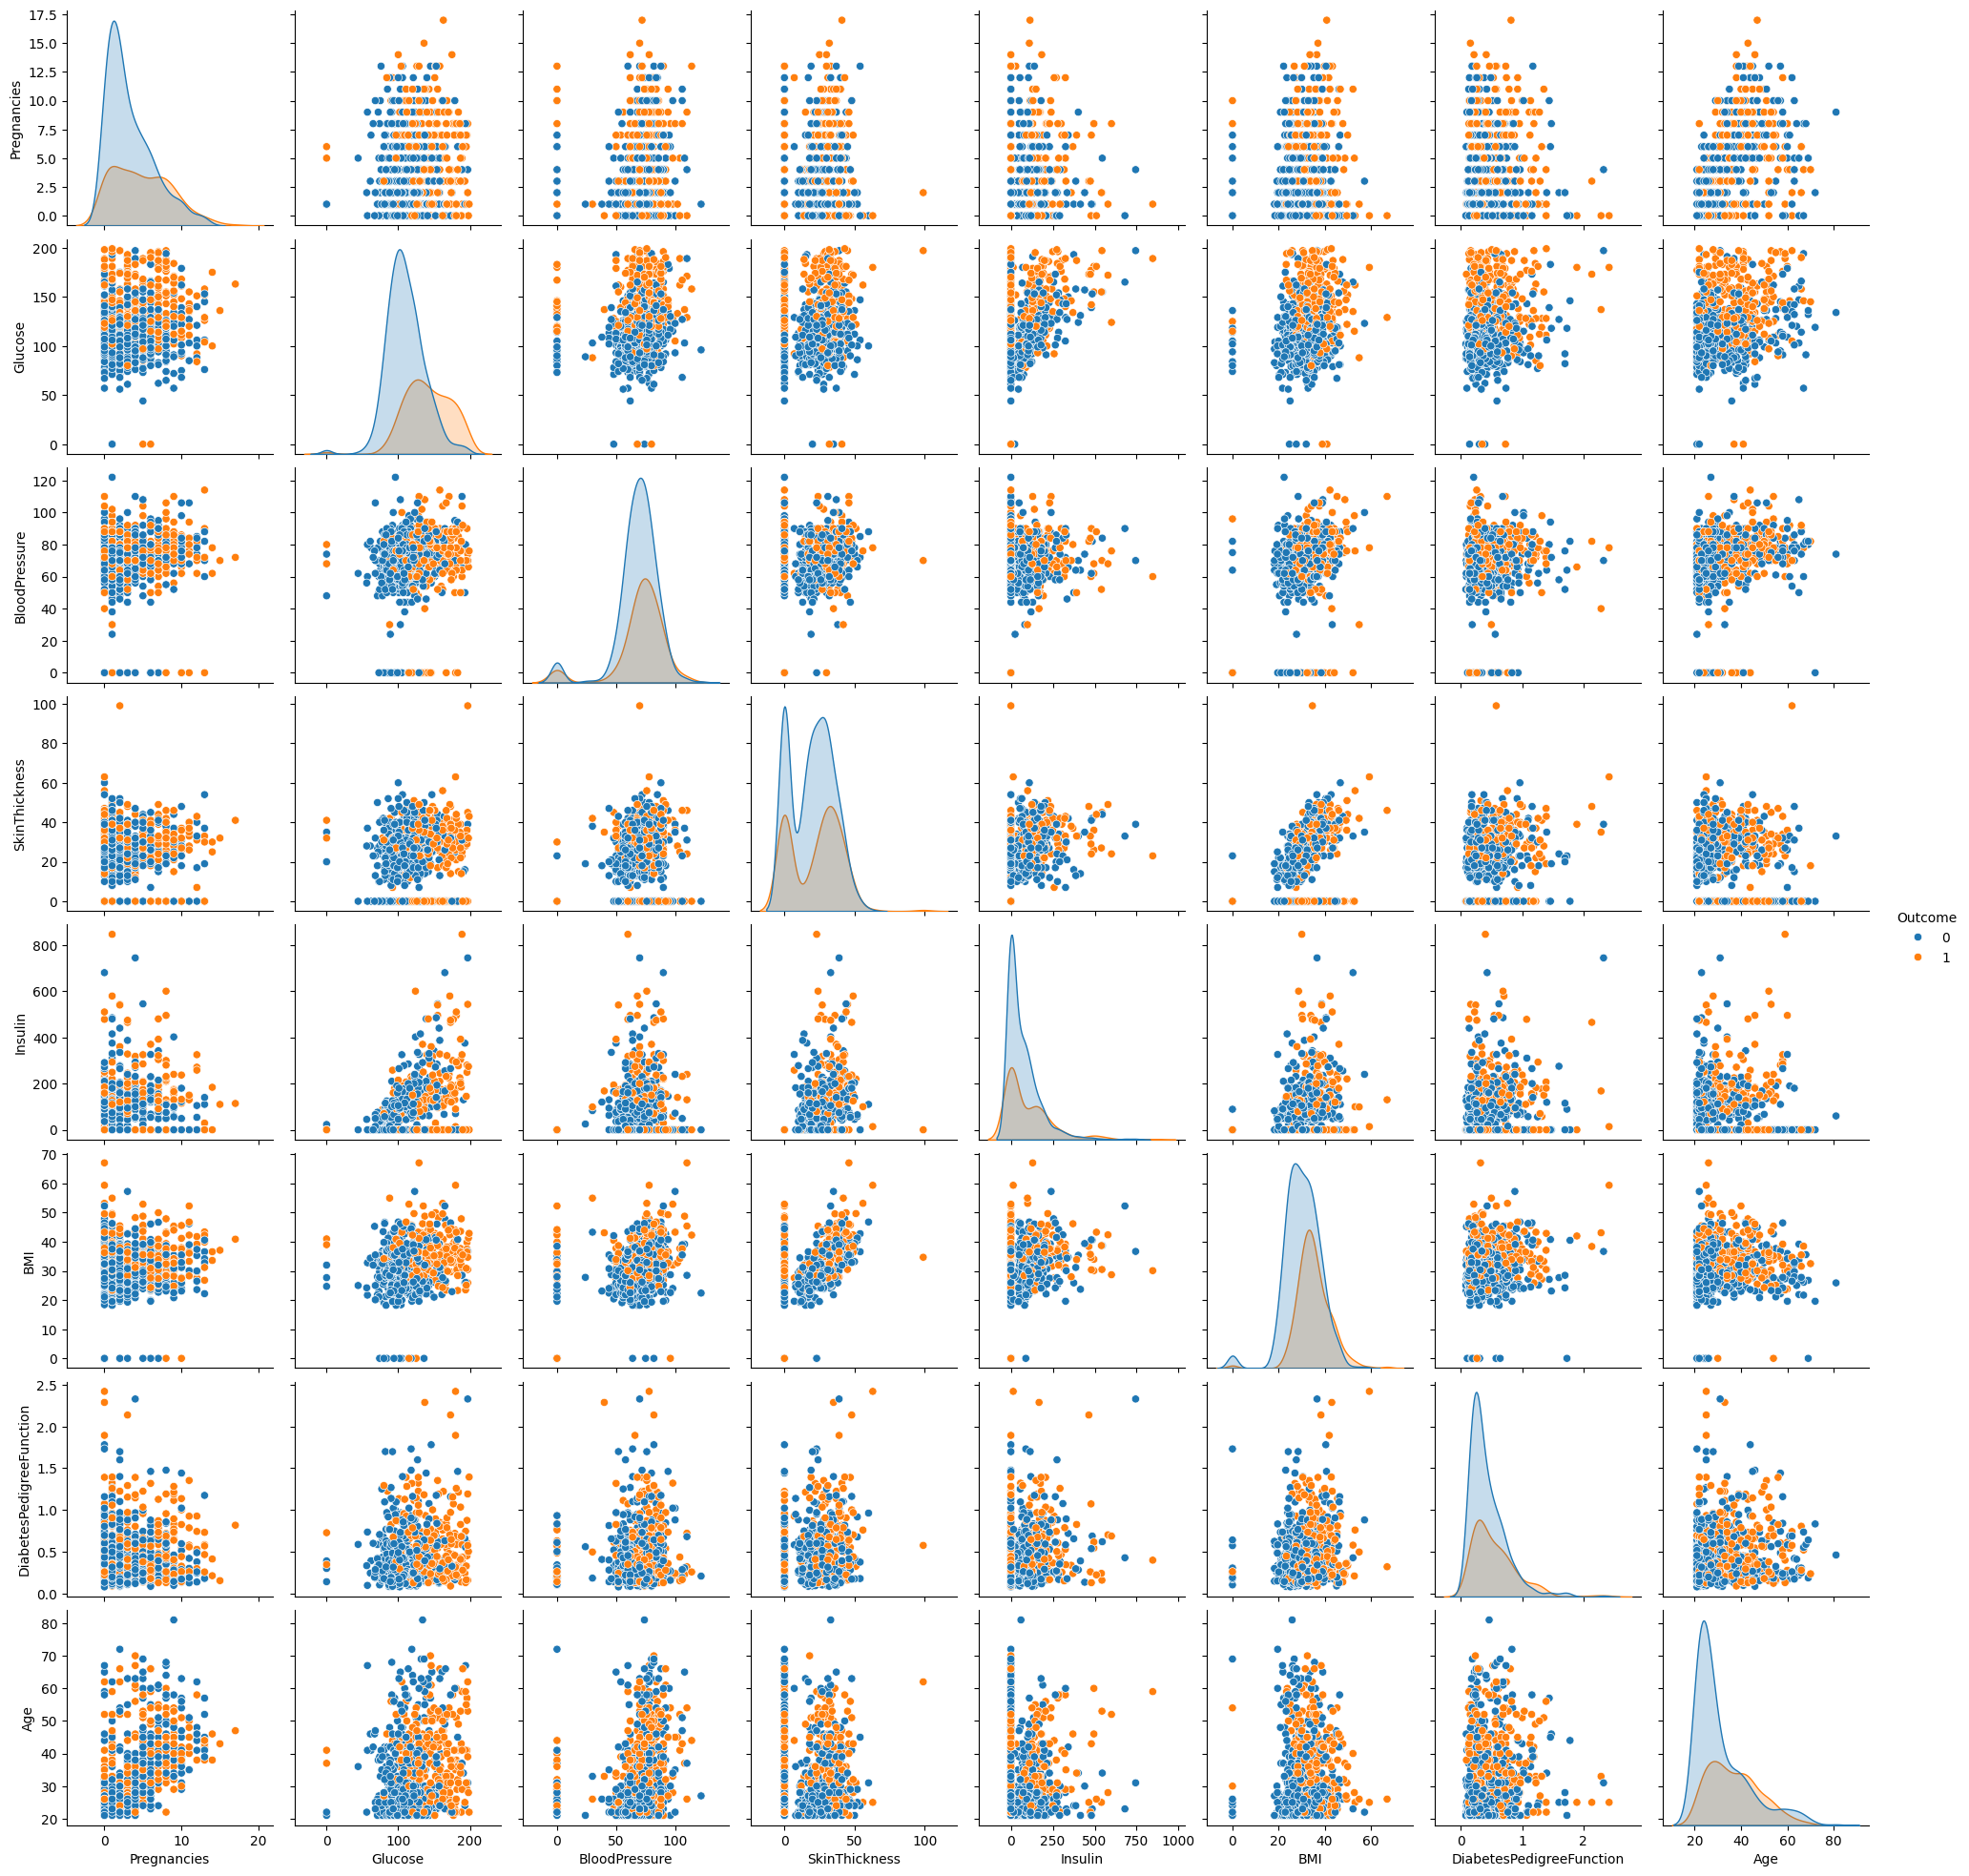

In [19]:
sns.pairplot(df,hue='Outcome')

#Data Preprocessing

In [20]:
scaler = StandardScaler()

In [21]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [22]:
scaler.fit(X)

StandardScaler()

In [23]:
X_scaled = scaler.transform(X)

Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#Model Training

In [27]:
from sklearn.tree import DecisionTreeClassifier # les arbres ne necessitent pas de faire de normalisation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier #Lutte contre l'overfitting
from sklearn.svm import SVC #pour les dataset de moyennes tailles 1k~10k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif #fclassif test anova
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [28]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [29]:
#model=make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif,k=10),RandomForestClassifier(random_state=0)) pour tester au debit juste le random forest

In [30]:
preprocessor=make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif,k=10))

In [31]:
RandomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost=make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))
KNN=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())

In [32]:
list_of_models={'RandomForest':RandomForest,'AdaBoost':AdaBoost,'SVM':SVM,'KNN':KNN}

In [33]:
def evaluation(model):
  model.fit(X_train,y_train)
  ypred=model.predict(X_test)
  print (confusion_matrix(y_test,ypred))
  print(classification_report(y_test,ypred))

  N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
  plt.figure(figsize=(10,6))
  plt.plot(N,train_score.mean(axis=1),label='train score')
  plt.plot(N,val_score.mean(axis=1),label='val score')
  plt.legend()

RandomForest
[[87 22]
 [22 23]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       109
           1       0.51      0.51      0.51        45

    accuracy                           0.71       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.71      0.71      0.71       154

AdaBoost
[[89 20]
 [20 25]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.56      0.56      0.56        45

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154

SVM
[[94 15]
 [24 21]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       109
           1       0.58      0.47      0.52        45

    accuracy                           0.75       154
   macro avg       0.69      0.66      0.67  

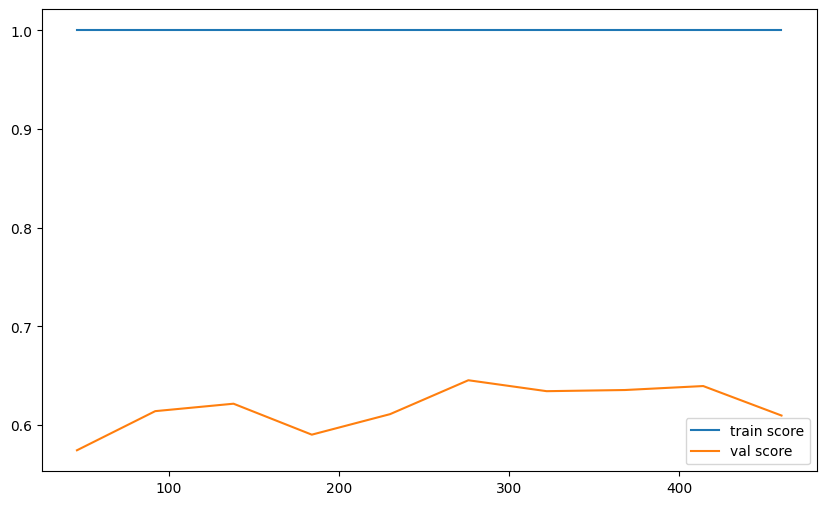

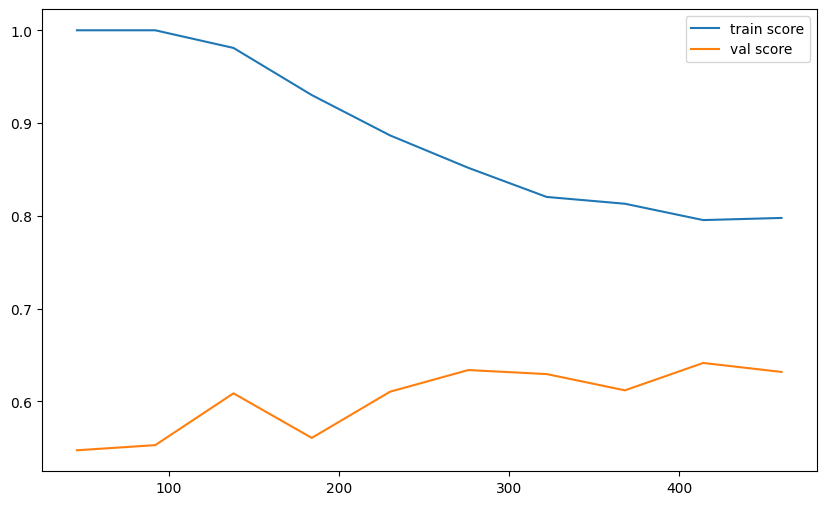

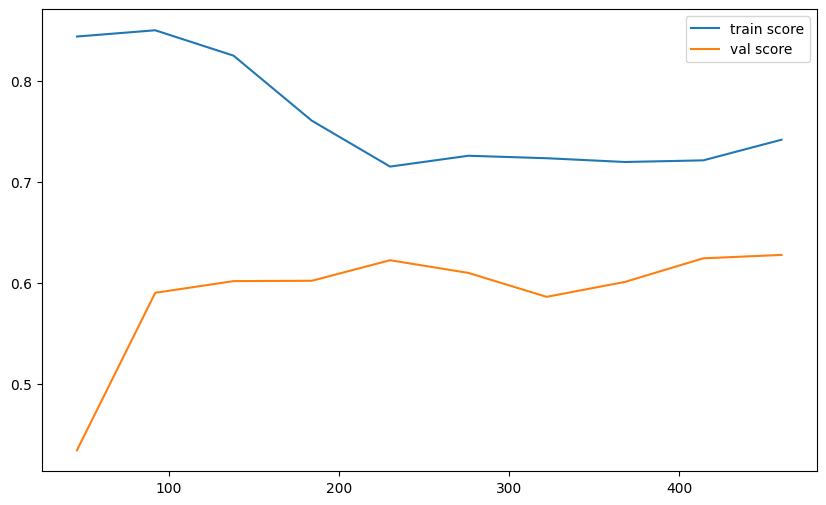

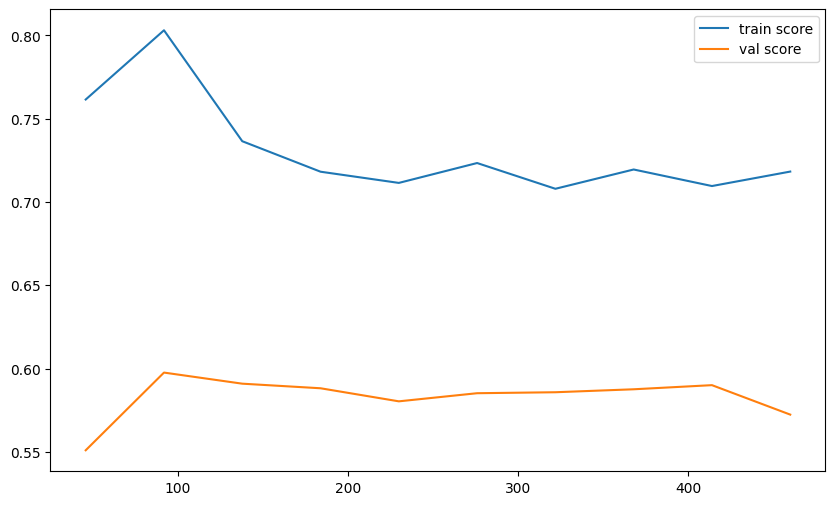

In [34]:
for key,model in list_of_models.items():
  print(key)
  evaluation(model)

In [ ]:
#model=RandomForestClassifier(random_state=0) #0 pour avoir une répétabilité

In [ ]:
#evaluation(model)

In [ ]:
#on est en overfitting donc on va essayer de faire de feature selection

In [ ]:
#model.feature_importances_  avec le random forest au debut pour comprendre

In [ ]:
#pd.DataFrame(model.feature_importances_, index=X.columns)

In [38]:
#pd.DataFrame(model.feature_importances_, index=X.columns).plot.bar()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [39]:
#model = svm.SVC(kernel='linear')

In [40]:
#model.fit(X_train, y_train)

SVC(kernel='linear')

In [41]:
#X_train_prediction = model.predict(X_train)
#training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [42]:
#X_test_prediction = model.predict(X_test)
#test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [43]:
#print('Accuracy score of the training data : ', training_data_accuracy)
#print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7719869706840391
Accuracy score of the test data :  0.7662337662337663


#Model Optimisation

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [45]:
SVM #pour voir le modele

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [36]:
hyper_params={'svc__gamma':[1e-3,1e-4,1e-5],
              'svc__C':[1000,10000],
              'pipeline__polynomialfeatures__degree':[2,3],
              'pipeline__selectkbest__k':(range(15,50))
              }


In [42]:
grid=RandomizedSearchCV(SVM,hyper_params,scoring='recall',cv=4,n_iter=40)
grid.fit(X_train,y_train)
print(grid.best_params_)
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

{'svc__gamma': 0.0001, 'svc__C': 10000, 'pipeline__selectkbest__k': 16, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       109
           1       0.65      0.49      0.56        45

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
#{'svc__gamma': 0.0001, 'svc__C': 1000, 'pipeline__selectkbest__k': 24, 'pipeline__polynomialfeatures__degree': 2} le meilleur so far
#{'svc__gamma': 1e-05, 'svc__C': 10000, 'pipeline__selectkbest__k': 43, 'pipeline__polynomialfeatures__degree': 2}


In [ ]:


# Définir les meilleurs hyperparamètres
#best_params = {
  #  'svc__gamma': 1e-05,
  #  'svc__C': 10000,
   # 'pipeline__selectkbest__k': 43,
   # 'pipeline__polynomialfeatures__degree': 2
#}

# Créer les pré-traitements et le modèle SVM avec les meilleurs hyperparamètres
#preprocessor = make_pipeline(PolynomialFeatures(degree=best_params['pipeline__polynomialfeatures__degree']),
            #               SelectKBest(f_classif, k=best_params['pipeline__selectkbest__k']))
#SVM = make_pipeline(preprocessor, StandardScaler(), SVC(C=best_params['svc__C'], gamma=best_params['svc__gamma'], random_state=0))


[[97 12]
 [23 22]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       109
           1       0.65      0.49      0.56        45

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.76      0.77      0.76       154



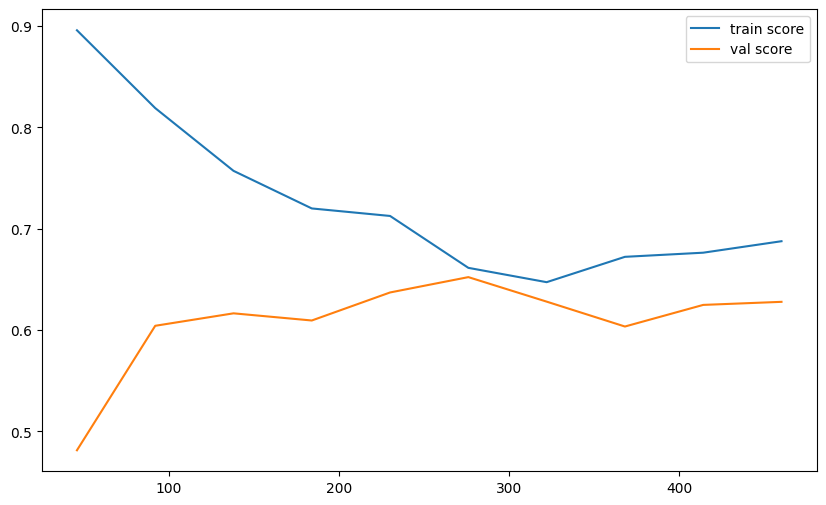

In [43]:
evaluation(grid.best_estimator_)

#Precision Recall Curve

In [45]:
from sklearn.metrics import precision_recall_curve

In [46]:
precision, recall,threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

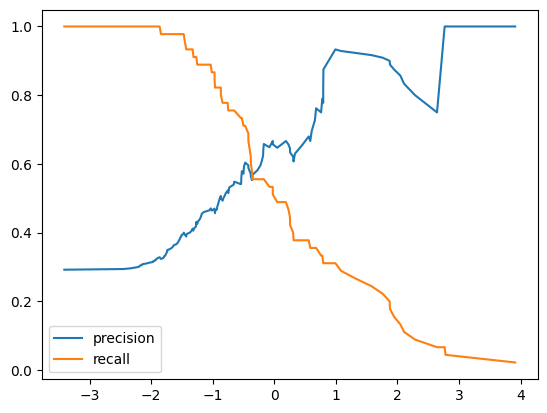

In [47]:
plt.plot(threshold,precision[:-1],label='precision')
plt.plot(threshold,recall[:-1],label='recall')
plt.legend()
plt.show()

In [56]:
def model_final (model,X,threshold):
  return model.decision_function(X) >threshold


In [57]:
y_pred=model_final(grid.best_estimator_,X_test,threshold=-1)

In [61]:
f1_score(y_test,y_pred)

0.609375

In [62]:
from sklearn.metrics import recall_score

In [63]:
recall_score(y_test,y_pred)

0.8666666666666667

#Making a predictive system

In [64]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model_final(grid.best_estimator_,std_data,threshold=-1)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]
[[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]]
[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[ True]
The person is diabetic
